In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data_df = pd.DataFrame(pd.merge(ride_data_df, city_data_df, on="city"))

# Display the data table for preview
data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


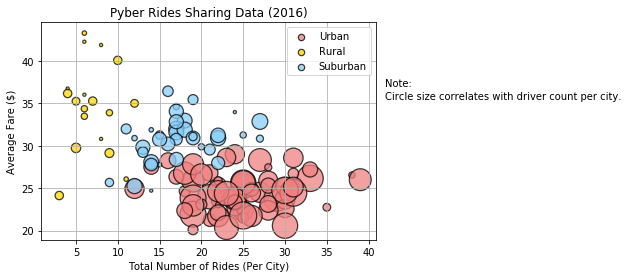

In [2]:
#Average Fare ($) Per City
fare_group = data_df.groupby(['type','city'])['fare'].mean()
average_fare = pd.DataFrame(fare_group)


#Total Number of Rides Per City
rides_group = data_df.groupby(['type','city'])['ride_id'].count()
nb_rides = pd.DataFrame(rides_group)


#Total Number of Drivers Per City
driver_group = data_df.groupby(['type','city'])['driver_count'].unique()
nb_drivers = pd.DataFrame(driver_group)
nb_drivers['driver_count']=nb_drivers['driver_count'].astype('float')


# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types


#Urban
x_axis = nb_rides.loc['Urban',"ride_id"]
y_axis = average_fare.loc['Urban',"fare"]
n = nb_drivers.loc['Urban',"driver_count"]
size=n*10


urban_plot = plt.scatter(x_axis, y_axis, s=size, marker="o", facecolors="lightcoral", edgecolors="black", label="Urban", alpha = 0.75, linewidth=1.25)

#Rural
x_axis1 = nb_rides.loc['Rural',"ride_id"]
y_axis1 = average_fare.loc['Rural',"fare"]
n1 = nb_drivers.loc['Rural',"driver_count"]
size1 = n1*10

rural_plot = plt.scatter(x_axis1, y_axis1, s=size1, marker="o", facecolors="gold", edgecolors="black", label="Rural", alpha = 0.75, linewidth=1.25)


#Suburban
x_axis2 = nb_rides.loc['Suburban',"ride_id"]
y_axis2 = average_fare.loc['Suburban',"fare"]
n2 = nb_drivers.loc['Suburban',"driver_count"]
size2 = n2*10

suburban_plot = plt.scatter(x_axis2, y_axis2, s=size2, marker="o", facecolors="lightskyblue", edgecolors="black", label="Suburban", alpha = 0.75, linewidth=1.25)


# Incorporate the other graph properties
# Create a title, x label, and y label for our chart
plt.title("Pyber Rides Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Create a legend
# Set our legend to where the chart thinks is best
lgnd = plt.legend(handles=[urban_plot, rural_plot, suburban_plot], loc="best")
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

#add grid
plt.grid(True)

# Incorporate a text label regarding circle size
textstr = 'Note:'
plt.text(42, 37, textstr, fontsize=10)
textstr2 = 'Circle size correlates with driver count per city.'
plt.text(42, 35.5, textstr2,fontsize=10)


# Save Figure
plt.savefig("../Images/Pyber_Data.png")

# Show plot
plt.show()


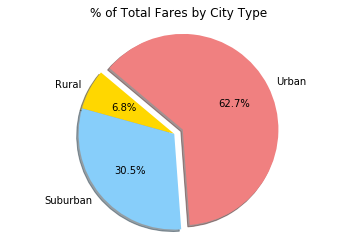

In [3]:
#Percents of Total Fares by City Type
#-------------------------------------

#total fares for every city type
type_fares = data_df.groupby('type')['fare'].sum()
#total fares of all cities
total_fares=data_df['fare'].sum()

#Percentage of Total Fares
fares_percentage = round((type_fares)*100/(total_fares),2)
fares_percentage_df = pd.DataFrame(fares_percentage)


#PIE CHART:
#Labels:
type_list = fares_percentage_df.keys()
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue","lightcoral"]
# Seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# Build Pie Chart
fares_pie = fares_percentage_df.plot(kind="pie", y=type_list, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, title=("% of Total Fares by City Type"))
fares_pie.set_ylabel("")

#remove legend
plt.gca().legend_.remove()

# Make the pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("../Images/fares_pie.png")

# Print our pie chart to the screen
plt.show()


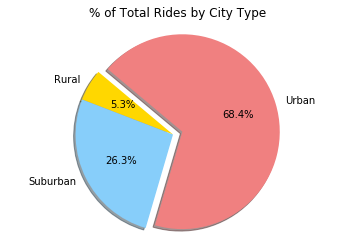

In [4]:
#Percents of Total Rides by City Type
#-------------------------------------

#total rides for every city type
type_rides = data_df.groupby('type')['ride_id'].count()
#total rides of all cities
total_rides = data_df['ride_id'].count()

#Percentage of Total Rides
rides_percentage = round((type_rides)*100/(total_rides),2)
rides_percentage_df = pd.DataFrame(rides_percentage)


#PIE CHART:
#Labels:
type_list = rides_percentage_df.keys()
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue","lightcoral"]
# Seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# Build Pie Chart
rides_pie = rides_percentage_df.plot(kind="pie", y=type_list, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, title=("% of Total Rides by City Type"))
rides_pie.set_ylabel("")

#remove legend
plt.gca().legend_.remove()

#  Make the pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("../Images/riders_pie.png")

# Print our pie chart to the screen
plt.show()


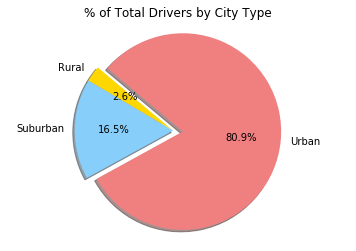

In [5]:
#Percents of Total Drivers by City Type
#-------------------------------------

#total drivers for every city type
type_drivers = city_data_df.groupby('type')['driver_count'].sum()
#total drivers in all cities
total_drivers = city_data_df['driver_count'].sum()

#Percentage of Total Drivers
drivers_percentage = round((type_drivers)*100/(total_drivers),2)
drivers_percentage_df = pd.DataFrame(drivers_percentage)


#PIE CHART:
#Labels:
type_list = drivers_percentage_df.keys()
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue","lightcoral"]
# Seperate the "Urban" section from the others
explode = (0, 0, 0.1)

#Build Pie Chart
drivers_pie = drivers_percentage_df.plot(kind="pie", y=type_list, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, title=("% of Total Drivers by City Type"))
drivers_pie.set_ylabel("")

#remove legend
plt.gca().legend_.remove()

# Make the pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("../Images/drivers_pie.png")

# Print our pie chart to the screen
plt.show()

